# TITLE : ANALYSIS OF UBER PICKUPS IN NEW YORK CITY
##### Author : Jas Patil

### Introduction:

#### We will be looking at Uber Pickup Data for the city of New York. This data consists of Uber Pickups from April to September of year 2014.

Lets start with importing libraries and getting the overview of the data

In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
ds1=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-apr14.csv")
ds2=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-may14.csv")
ds3=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-jun14.csv")
ds4=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-jul14.csv")
ds5=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-aug14.csv")
ds6=pd.read_csv("C:/Users/jaspa/Downloads/uber-raw-data-sep14.csv")

In [3]:
#Aggretation of 6upper files in 1 using concat function 
agg_ds=pd.concat([ds1,ds2,ds3,ds4,ds5,ds6])

In [4]:
#Checking the Final Dataset
agg_ds

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [5]:
#Summary of DATASET 
agg_ds.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


In [6]:
agg_ds['Date/Time'] = pd.to_datetime(agg_ds['Date/Time'])

In [7]:
#Getting the Month from the final dataset

agg_ds['Month'] = agg_ds['Date/Time'].dt.month

In [8]:
agg_ds['Month']

0          4
1          4
2          4
3          4
4          4
          ..
1028131    9
1028132    9
1028133    9
1028134    9
1028135    9
Name: Month, Length: 4534327, dtype: int64

In [9]:
#Sorting the final data based on the month
agg_ds=agg_ds.sort_values(by='Month', ascending=False)

#Changing the month values and converting them to the names of the month 
agg_ds['Month'] = agg_ds['Month'].apply(lambda x: calendar.month_abbr[x])

In [10]:
agg_ds['Month']

1028135    Sep
342707     Sep
342720     Sep
342719     Sep
342718     Sep
          ... 
376351     Apr
376352     Apr
376353     Apr
376354     Apr
0          Apr
Name: Month, Length: 4534327, dtype: object

In [11]:
#Getting the Day from the dataset 
agg_ds['Day'] = agg_ds['Date/Time'].dt.day

In [12]:
#Getting the DAY OF THE WEEK from the dataset
agg_ds['DOW'] = agg_ds['Date/Time'].dt.dayofweek

#### The original dataset just showed Date/time as time stamp but to analyze we created 3 more columns "Base", "Day" and "DOW". By doing this anyone can do specific finding based on which month or which day or which day of the week Uber had the most number of pickups.

In [13]:
agg_ds

,Date/Time,Lat,Lon,Base,Month,Day,DOW
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,Sep,30,1
342707,2014-09-06 10:48:00,40.6733,-73.9763,B02617,Sep,6,5
342720,2014-09-06 10:50:00,40.7218,-73.9947,B02617,Sep,6,5
342719,2014-09-06 10:50:00,40.7933,-73.9152,B02617,Sep,6,5
342718,2014-09-06 10:50:00,40.7152,-74.0131,B02617,Sep,6,5
...,...,...,...,...,...,...,...
376351,2014-04-07 05:25:00,40.7283,-74.0031,B02682,Apr,7,0
376352,2014-04-07 05:25:00,40.6141,-73.9187,B02682,Apr,7,0
376353,2014-04-07 05:26:00,40.7341,-73.9812,B02682,Apr,7,0
376354,2014-04-07 05:26:00,40.7349,-73.9813,B02682,Apr,7,0


#### Below is a Bar Chart describing the number of trips per day for each month from April to September. As it is visible from the chart that most trips have come on the 30th Day of the Month.

#### To get more in depth analysis we will dive deeper to understand more about the dataset.

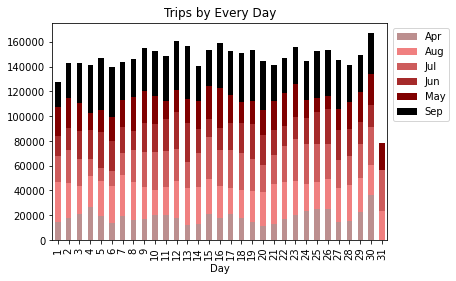

In [14]:
#Daily Trips for Each Month
agg_ds.groupby(['Month','Day'])['Day'].count().unstack('Month').plot.bar(stacked=True,color=("rosybrown","lightcoral","indianred","brown","maroon","black"),title="Trips by Every Day").legend(bbox_to_anchor=(1.2, 1))

In [15]:
agg_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 1028135 to 0
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Day        int64         
 6   DOW        int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 242.2+ MB


In [16]:
agg_ds.describe()

,Lat,Lon,Day,DOW
count,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01,1.594337e+01,2.968115e+00
std,3.994991e-02,5.726670e-02,8.744902e+00,1.875971e+00
min,3.965690e+01,-7.492900e+01,1.000000e+00,0.000000e+00
25%,4.072110e+01,-7.399650e+01,9.000000e+00,1.000000e+00
50%,4.074220e+01,-7.398340e+01,1.600000e+01,3.000000e+00
75%,4.076100e+01,-7.396530e+01,2.300000e+01,5.000000e+00
max,4.211660e+01,-7.206660e+01,3.100000e+01,6.000000e+00


In [17]:
agg_ds

,Date/Time,Lat,Lon,Base,Month,Day,DOW
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,Sep,30,1
342707,2014-09-06 10:48:00,40.6733,-73.9763,B02617,Sep,6,5
342720,2014-09-06 10:50:00,40.7218,-73.9947,B02617,Sep,6,5
342719,2014-09-06 10:50:00,40.7933,-73.9152,B02617,Sep,6,5
342718,2014-09-06 10:50:00,40.7152,-74.0131,B02617,Sep,6,5
...,...,...,...,...,...,...,...
376351,2014-04-07 05:25:00,40.7283,-74.0031,B02682,Apr,7,0
376352,2014-04-07 05:25:00,40.6141,-73.9187,B02682,Apr,7,0
376353,2014-04-07 05:26:00,40.7341,-73.9812,B02682,Apr,7,0
376354,2014-04-07 05:26:00,40.7349,-73.9813,B02682,Apr,7,0


In [18]:
# Few more imports
import matplotlib.pyplot as plt # importing matplotlib for manipulating figures
import ipywidgets # for interactivity
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_datetime64_any_dtype #to check the data type of columns

In [19]:
#Downsizing to check the data since there the data set is too huge
no_samples = 5000
DownSamplingMask = np.random.choice(range(len(agg_ds)-1), no_samples, replace=False)
agg_ds_new = agg_ds.iloc[DownSamplingMask]

In [20]:
agg_ds_new

,Date/Time,Lat,Lon,Base,Month,Day,DOW
304578,2014-06-06 18:10:00,40.6866,-73.9211,B02617,Jun,6,4
730138,2014-07-23 14:28:00,40.7290,-74.0092,B02682,Jul,23,2
478378,2014-09-16 17:06:00,40.7552,-73.9795,B02617,Sep,16,1
292128,2014-07-02 17:05:00,40.7708,-73.9663,B02617,Jul,2,2
501006,2014-04-24 20:23:00,40.6484,-73.7827,B02682,Apr,24,3
...,...,...,...,...,...,...,...
29330,2014-09-25 14:57:00,40.7738,-73.8717,B02512,Sep,25,3
258,2014-07-01 11:15:00,40.7238,-74.0106,B02512,Jul,1,1
802892,2014-09-23 11:45:00,40.7879,-73.9757,B02682,Sep,23,1
646220,2014-09-30 14:10:00,40.7034,-73.9846,B02617,Sep,30,1


In [21]:
agg_ds.head()

,Date/Time,Lat,Lon,Base,Month,Day,DOW
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,Sep,30,1
342707,2014-09-06 10:48:00,40.6733,-73.9763,B02617,Sep,6,5
342720,2014-09-06 10:50:00,40.7218,-73.9947,B02617,Sep,6,5
342719,2014-09-06 10:50:00,40.7933,-73.9152,B02617,Sep,6,5
342718,2014-09-06 10:50:00,40.7152,-74.0131,B02617,Sep,6,5


In [22]:
# Creating a plot "Rides per Base per Month"

import bqplot
from bqplot import pyplot as plt

fig = plt.figure(title="Rides per Base per Month",
                 #fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150},
                 legend_location="top-left")

month = agg_ds.groupby(['Month','Base'])['Date/Time'].count().unstack('Month')

bar_chart  = plt.bar(x = month.index.tolist(), y= month.T.to_numpy(),
                     labels = month.columns.tolist(),
                     display_legend=True,
                    interactions = {'click': 'select'},
                 anchor_style = {'fill': 'white'},
                 selected_style={'stroke': 'white', 'stroke-width': 3},
                 unselected_style={'opacity':0.6})

bar_chart.type = "grouped"

bar_chart.colors = ["lightcoral","red","salmon","peru","crimson","mediumorchid","slateblue" ]


plt.show()

In [23]:
# Defining the two plots in the first interactivity 
from bqplot import pyplot as plt
from bqplot import LinearScale

# Getting the max range for the rides to set the y limit 
y_max = month.max().max()
y_linear = LinearScale(max=float(y_max))

figure3 = plt.figure(title="Number of Rides Per Base",
                 #fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150},
                 legend_location="top-left")

base = agg_ds.groupby(['Base']).size()


base_chart  = plt.bar(x = base.index.tolist(), y= base.to_numpy(),
                    interactions = {'click': 'select'},
                 anchor_style = {'fill': 'white'},
                 selected_style={'stroke': 'white', 'stroke-width': 3},
                 unselected_style={'opacity':0.6})
# bar_chart.ylim(0, y_max+1000)

base_chart.colors = ["teal"]

#Sizing the figure in the first part of the dahboard
figure3.layout.width='50%'


#Creating the second plot for the first part of the dashboard
m1 = agg_ds.groupby(['Month']).size()

figure4 = plt.figure(title="Month wise Rides for the Base")


m1_plot  = plt.bar(x = m1.index.tolist(), y= m1.to_numpy())


m1_plot.colors = ["maroon","chocolate","darkorange","lawngreen","aquamarine","blueviolet"]


figure4.layout.width='50%'

In [24]:
#Code for interactivity between the bar plots 

out = ipywidgets.Output()

def on_selected_base(self, change, agg_ds):
#     print(change, self)
    base = None
    month = None
    if len(self.selected) == 0:
            label.value = 'No data selected!!'
            return
    base = self.x[change['data']['index']]

    
    subset = agg_ds.loc[(agg_ds['Base'] == base)]
    
    dow = subset.groupby(['Month']).size()
    
    m1_plot.x = dow.index.tolist()
    m1_plot.y = dow.values.tolist()
    
base_chart.on_element_click(lambda _, x: on_selected_base(_, x, agg_ds))

db = ipywidgets.HBox([figure3, figure4])
db

In [25]:
# Creating the plot for the Rides per base per day of the week for the selected month 
dow = agg_ds.groupby(['Base','DOW'])['Base'].count().unstack('DOW')#.plot.bar(stacked=False,color=("bisque","tan","lavender","lightgrey","aqua","beige","lightpink"),title="Trips by Bases and Days of Week",figsize=(10,7),width=0.8,legend=False).legend(bbox_to_anchor=(1.2, 1))
dow

fig = plt.figure(title="Rides Per Base for the selected Month Per Day in the Month ",
                 fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150})

dow = agg_ds.groupby(['DOW','Base'])['Date/Time'].count().unstack('DOW')

dow_plot  = plt.bar(x = [str(x) for x in dow.columns.tolist()], y= dow.to_numpy())

dow_plot.type = "grouped"

dow_plot.colors = ["mediumturquoise" , "darkcyan" , "powderblue" , "deepskyblue" , "slateblue" , "darkviolet" , "hotpink"]

plt.show()

In [26]:
# Defining the Onclick event 
# Calback function to interact with bar plot
def on_selected(self, change, agg_ds):
#     print(change, self)
    base = None
    month = None
    if len(self.selected) == 0:
            label.value = 'No data selected!!'
            return
    base = self.x[change['data']['index']]
    month = self.labels[change['data']['subIndex']]

    
    subset = agg_ds.loc[(agg_ds['Base'] == base) & (agg_ds['Month'] == month)]
    
    dow = subset.groupby(['DOW','Base'])['Date/Time'].count().unstack('DOW')
    
    dow_plot.x = [str(x) for x in dow.columns.tolist()]
    dow_plot.y = dow.values.tolist()
    
bar_chart.on_element_click(lambda _, x: on_selected(_, x, agg_ds))

In [27]:
#Defining the two plots for the second interactivity

from bqplot import pyplot as plt
from bqplot import LinearScale

y_max = month.max().max()
y_linear = LinearScale(max=float(y_max))

fig = plt.figure(title="Rides Per Base Per Month",
                 #fig_margin={'top':50, 'bottom':20, 'left':150, 'right':150},
                 legend_location="top-left")

month = agg_ds.groupby(['Month','Base'])['Date/Time'].count().unstack('Month')


bar_chart  = plt.bar(x = month.index.tolist(), y= month.T.to_numpy(),
                     scales = {'y': y_linear},
                     labels = month.columns.tolist(),
                     display_legend=True,
                    interactions = {'click': 'select'},
                 anchor_style = {'fill': 'white'},
                 selected_style={'stroke': 'white', 'stroke-width': 3},
                 unselected_style={'opacity':0.6})
# bar_chart.ylim(0, y_max+1000)

bar_chart.type = "grouped"

bar_chart.colors = ["lightcoral","red","salmon","peru","crimson","mediumorchid","slateblue" ]

fig.layout.width = '50%'


#Figure two of the second interactivity
dow = agg_ds.groupby(['Base','DOW'])['Base'].count().unstack('DOW')#.plot.bar(stacked=False,color=("bisque","tan","lavender","lightgrey","aqua","beige","lightpink"),title="Trips by Bases and Days of Week",figsize=(10,7),width=0.8,legend=False).legend(bbox_to_anchor=(1.2, 1))
dow

fig2 = plt.figure(title="Per Base Rides for particular Month Per Day in the Month")

dow = agg_ds.groupby(['DOW','Base'])['Date/Time'].count().unstack('DOW')

dow_plot  = plt.bar(x = [str(x) for x in dow.columns.tolist()], y= dow.to_numpy())

dow_plot.type = "grouped"

dow_plot.colors = ["mediumturquoise" , "darkcyan" , "powderblue" , "deepskyblue" , "slateblue" , "darkviolet" , "hotpink"]

fig2.layout.width = '50%'

In [28]:
#Code for interactivity between the bar plots 
out = ipywidgets.Output()

def on_selected(self, change, agg_ds):
#     print(change, self)
    base = None
    month = None
    if len(self.selected) == 0:
            label.value = 'No data selected!!'
            return
    base = self.x[change['data']['index']]
    month = self.labels[change['data']['subIndex']]

    
    subset = agg_ds.loc[(agg_ds['Base'] == base) & (agg_ds['Month'] == month)]
    
    dow = subset.groupby(['DOW','Base'])['Date/Time'].count().unstack('DOW')
    
    dow_plot.x = [str(x) for x in dow.columns.tolist()]
    dow_plot.y = dow.values.tolist()
    
bar_chart.on_element_click(lambda _, x: on_selected(_, x, agg_ds))

db = ipywidgets.HBox([fig, fig2])
db

In [30]:
# Creating the final dashboard
final_db = ipywidgets.VBox([ipywidgets.HBox([figure3, figure4]), ipywidgets.HBox([fig, fig2])])
final_db

#### We can see that there is an interactive dashboard of the detailed analysis of the dataset. All the visualizations are made in Bar Chart as it helps visualize the discrete numeric values better. 

As the data consists of more than 4.5 million pickups in the timeframe of April to September, the first visualization shows us the number of pickups that happened at one specific location/base. And from that we can come to a conclusion that base B02617 had the most number of pickups out of all the 5 bases. The second visualization is made to be interacted with the first visualization, so if we select a particualar base in the first visualization, the second visualization will show result on the basis of the base selected. The second visualization shows "Month wise Rides for teh Base". So, after selecting in the most number of pickup base i.e B02617 we can see that the 2nd visualization shows how many pickups happened in that base for each month in detail. We can clearly see that the month of September had most rides in that base whereas April month gave the least amount of rides.

The 3rd visualization is the combination of first and second visualization in 1 Chart. So instead of clicking one visualization and waiting for the second visualization to change, this 3rd visualization gives us all the information of Number of Rides per Base per Month so that we can have detailed analysis without much hassle.

The 4th visualization is interacted with the 3rd visualization and it shows Number of rides based on the day of the week of the selected Base and the selected Month. So from this visualization we can have detailed analysis of which day of the week had the most rides of any base for any month. For example, when we select base B02617 and the month we select is September which is the month that base had most numbe rof pickups, we can see that the 4th visualization shows us how many pickups it had according to the day of the week and according to this graph, Monday which is 2nd day of the week had the most number of pickups around 60,000. And it is possible as people who go to offices might have taken Uber.

## The following are 2 contextual visualizations :

### First Visualization : In the following visualization, they plotted the number of trips that have been taken by the passengers from each of the bases. There are five bases in all out of which, it can be observed that B02617 had the highest number of trips. To make more detailed observations they have divided the total number of trips according to each month and we can come to a conclusion that the for base B02617, September month had the most number of trips.
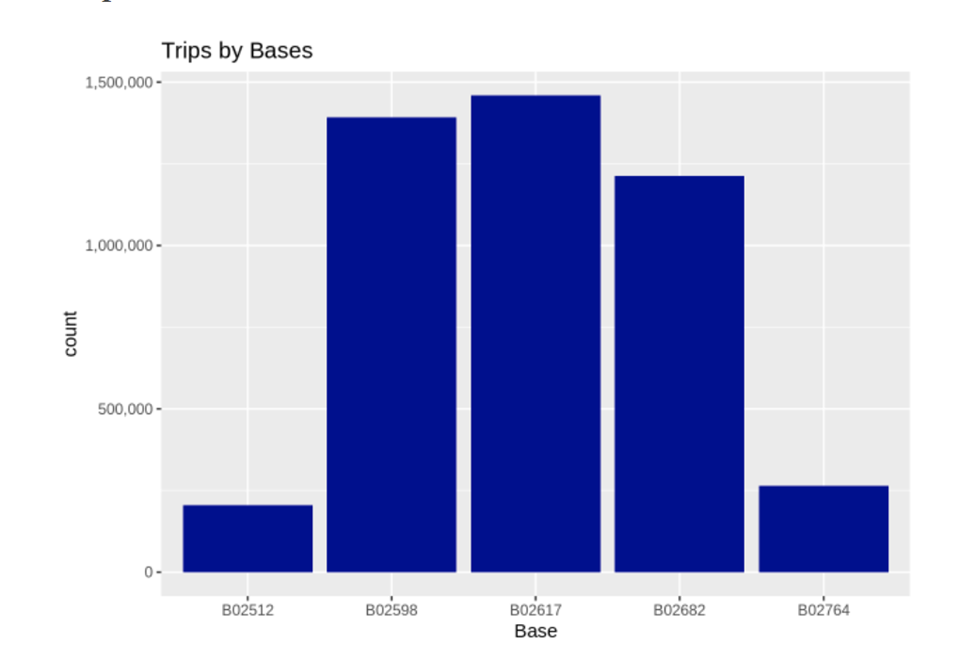

### In the following visualization, they plotted the number of trips that have been taken by the passengers from each of the bases. There are five bases in all out of which, it can be observed that B02617 had the highest number of trips. To make more detailed observations they have divided the total number of trips according to each month and we can come to a conclusion that the for base B02617, September month had the most number of trips.
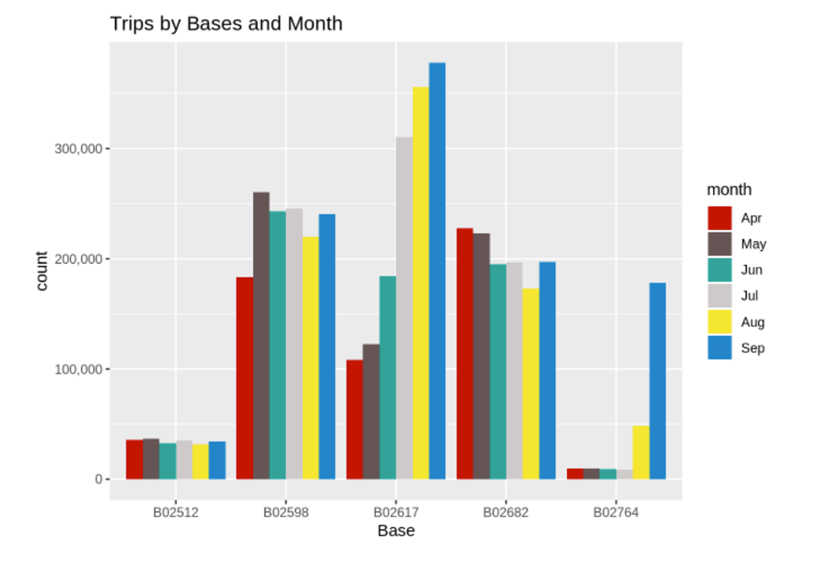



### Second Visualization : In this visualization, they wanted to figure out which product is most selected out of UberX, Pool and Black and we can see that UberX is the preferred product type with a frequency of 90.3%.
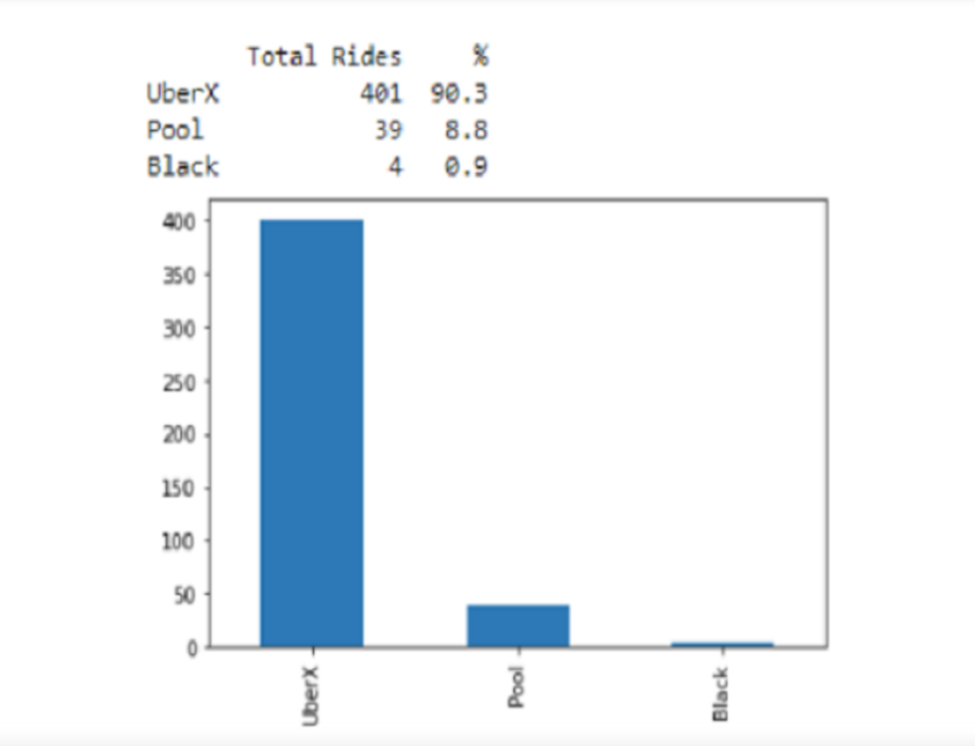

### In the second visualization, they made a heatmap with power to show the most visited areas in all hues and sizes. The above heatmap shows the red is the most in-demand region for Uber cabs followed by the green region. Uber should increase the number of cabs in these regions to increase customer satisfaction and revenue.
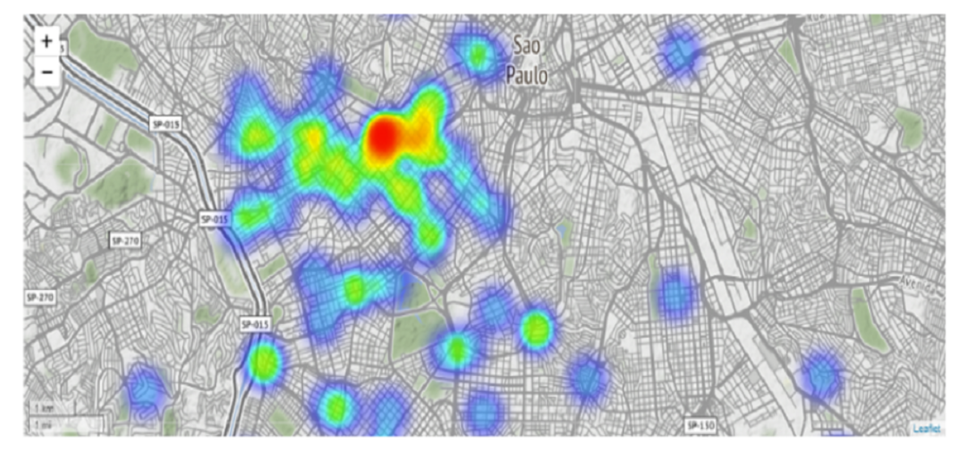

## Data Sources and Contextual Visualization Links :

Link to the dataset -  https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city
Data Size:
uber-raw-data-apr14.csv - 24.9 MB
uber-raw-data-may14.csv - 28.7 MB
uber-raw-data-jun14.csv - 29.2 MB
uber-raw-data-jul14.csv - 35.1 MB
uber-raw-data-aug14.csv - 36.5 MB
uber-raw-data-sep14.csv - 45.3 MB

1st Contextual visualization link : https://data-flair.training/blogs/r-data-science-project-uber-data-analysis/
2nd Contextual visualization link : https://www.analyticsvidhya.com/blog/2021/10/end-to-end-predictive-analysis-on-ubers-data/
